In [1]:
import torch
import torchvision 
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
import rasterio
from aeronet.converters.split import split
import numpy as np
from torchvision.transforms.functional import *
from torchvision.utils import save_image
import itertools
import os

Opening the original 8-bit (!) image

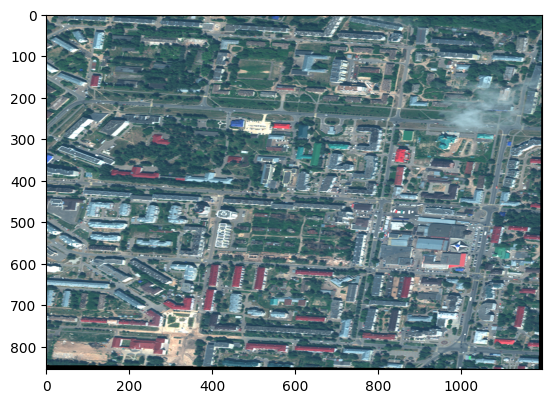

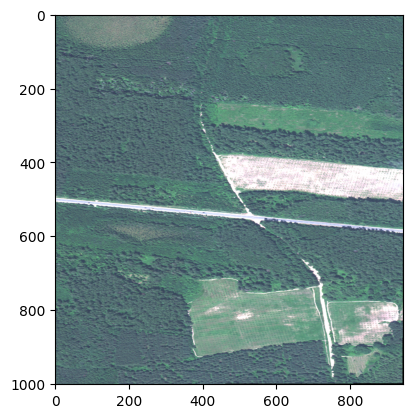

In [2]:
images = []

for i in range(2):
    image = rasterio.open("images/"+ str(i+1) +".tif")
    image = image.read().swapaxes(0,2).swapaxes(0,1)/255
    images.append(image)
    plt.imshow(image)
    plt.show()

Get some basic image transforms from torchvision.transforms.functional module:

1. Adjust contrast of an image.  
contrast_factor – How much to adjust the contrast. Can be any non-negative number. 0 gives a solid gray image, 1 gives the original image while 2 increases the contrast by a factor of 2.

2. Gamma correction on an image.  
gamma – Non negative real number, same as in the equation. gamma larger than 1 make the shadows darker, while gamma smaller than 1 make dark regions lighter.\
Also known as Power Law Transform. Intensities in RGB mode are adjusted based on the following equation: 

$$ I_{\text{out}} = 255 \times \text{gain} \times \left(\frac{I_{\text{in}}}{255}\right)^{\gamma} $$


3. Adjust hue of an image.  
The image hue is adjusted by converting the image to HSV and cyclically shifting the intensities in the hue channel (H). The image is then converted back to original image mode. \
hue_factor is the amount of shift in H channel and must be in the interval [-0.5, 0.5].

4. Adjust color saturation of an image.  
saturation_factor – How much to adjust the saturation. 0 will give a black and white image, 1 will give the original image while 2 will enhance the saturation by a factor of 2.

5. Rotate the image by angle.  
angle – rotation angle value in degrees, counter-clockwise.

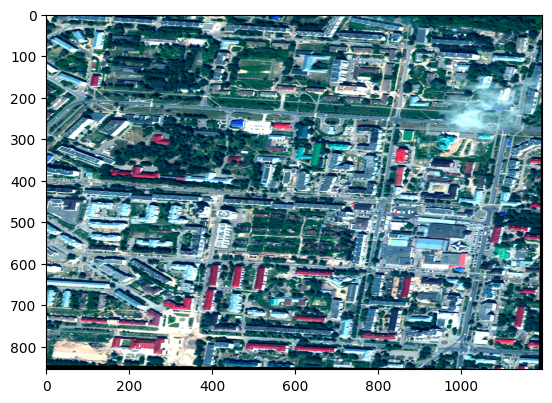

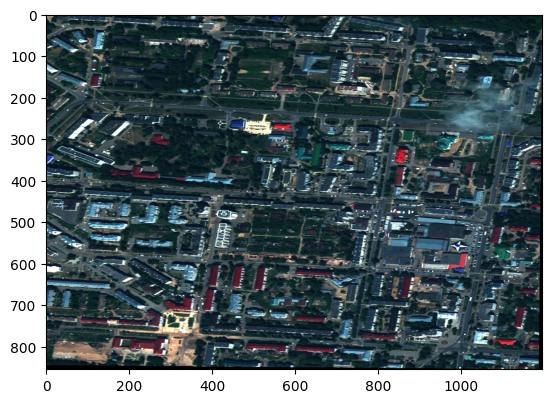

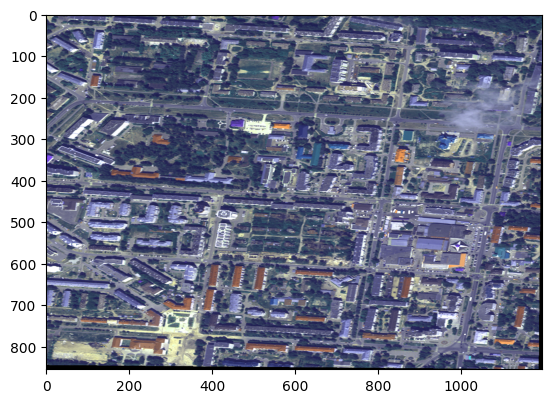

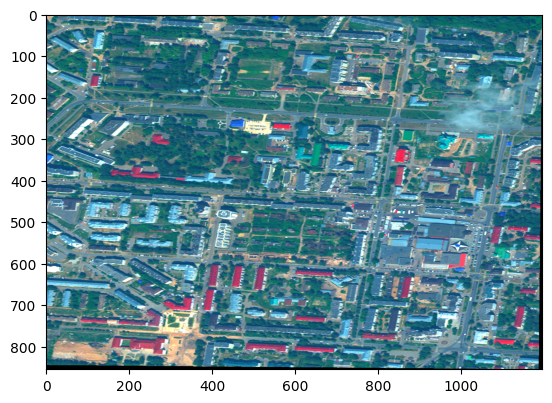

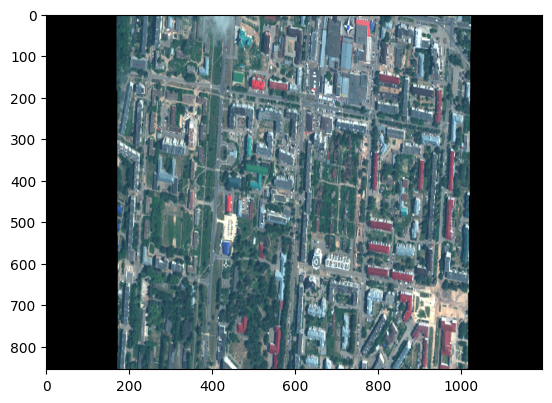

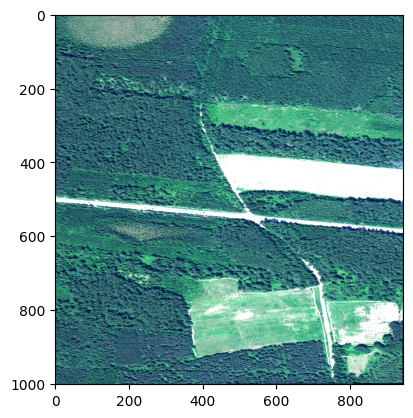

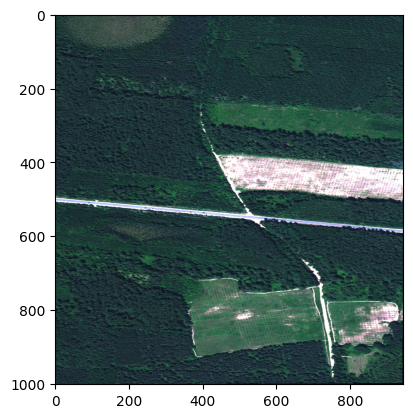

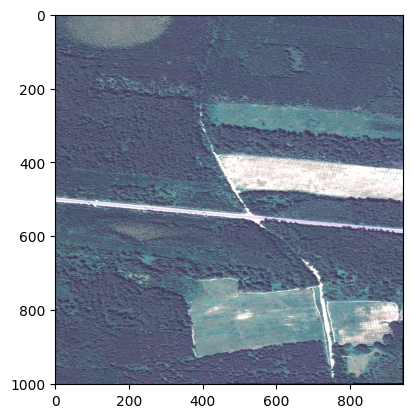

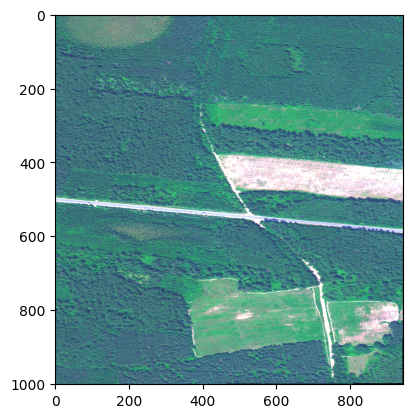

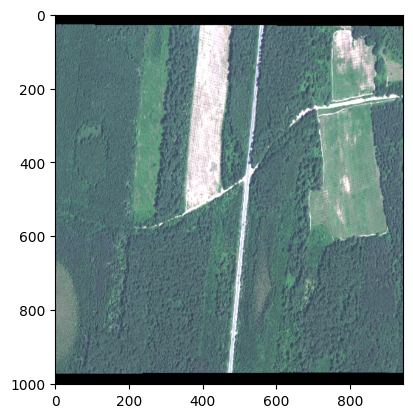

In [9]:
transforms_ = [adjust_contrast, adjust_gamma, adjust_hue, adjust_saturation, rotate]
pars = [{'contrast_factor':2}, {'gamma':1.9}, {'hue_factor':0.1}, {'saturation_factor':2}, {'angle':90}]
names = ['adjust_contrast','adjust_gamma', 'adjust_hue', 'adjust_saturation', 'rotate']

for i in range(2):
    for transform, par, name in itertools.zip_longest(transforms_, pars, names):
        img = ToTensor()(images[i])
        T_img = transform(img, **par)
        T_img = ToPILImage()(T_img)
        plt.imshow(T_img)
        plt.show()
        
        DATASET_FOLDER = 'distorted_images/'+ str(name) + '/'
        try:
            original_umask = os.umask(0)
            os.makedirs(DATASET_FOLDER, mode = 0o777)
        except:
            pass
        finally:
            os.umask(original_umask) 
        save_image(ToTensor()(T_img), DATASET_FOLDER + str(i+1) + '.tif')


Transforms are common image transformations available in the torchvision.transforms module. 

1. Gaussian Blur  
Blurs image with randomly chosen Gaussian blur. If the image is torch Tensor
kernel_size – Size of the Gaussian kernel.

2. Gray scale  
Convert image to grayscale. If the image is torch Tensor, it is expected to have […, 3, H, W] shape, where … means an arbitrary number of leading dimensions. \
num_output_channels – (1 or 3) number of channels desired for output image. \
If num_output_channels == 1 : returned image is single channel \
If num_output_channels == 3 : returned image is 3 channel with r == g == b

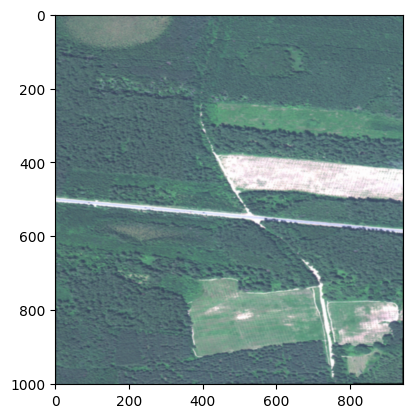

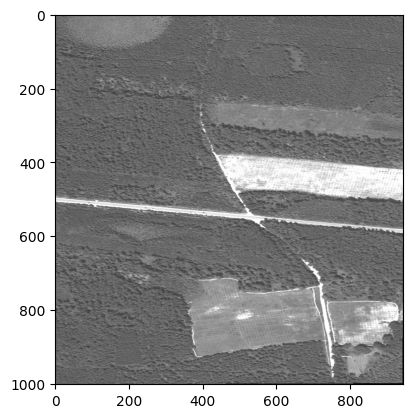

In [8]:
transforms_ = [transforms.GaussianBlur(19), transforms.Grayscale(3)]
names = ['GaussianBlur', 'Grayscale']

for transform, name in zip(transforms_, names):
    T_img = transform(img)
    T_img = ToPILImage()(T_img)
    plt.imshow(T_img)
    plt.show()

    DATASET_FOLDER = 'distorted_images/'+ str(name) + '/'
    try:
        original_umask = os.umask(0)
        os.makedirs(DATASET_FOLDER, mode = 0o777)
    except:
        pass
    finally:
        os.umask(original_umask)
    save_image(ToTensor()(T_img), DATASET_FOLDER + str(i+1) + '.tif')
